                                             Assignment 03
                                        190626H -- Tharundi P.D.

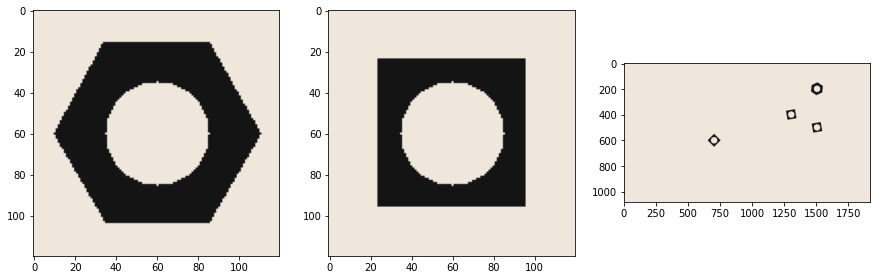

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize = (15,15))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Converting the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

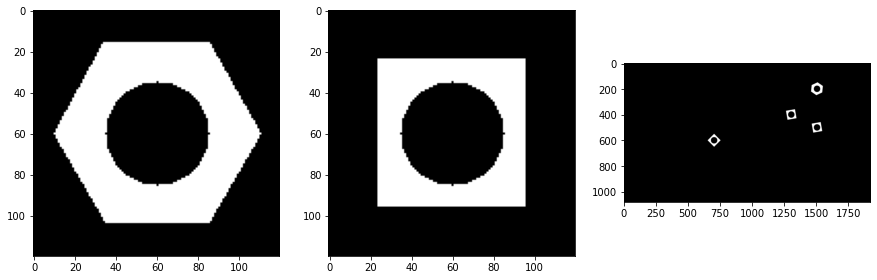

In [3]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1, th1 =  cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2, th2 =  cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3, th3 =  cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3, figsize = (15,15))
ax[0].imshow(th1, cmap = 'gray')
ax[1].imshow(th2, cmap = 'gray')
ax[2].imshow(th3, cmap = 'gray')
plt.show()

Carrying out morphological closing to remove small holes inside the foreground.

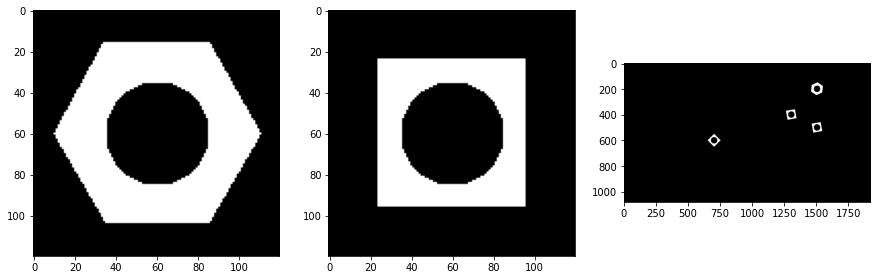

In [4]:
kernel = np.ones((3,3),np.uint8)

closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize =(15,15))
ax[0].imshow(closing1, cmap = 'gray')
ax[1].imshow(closing2, cmap = 'gray')
ax[2].imshow(closing3, cmap = 'gray')
plt.show()

Connected components analysis

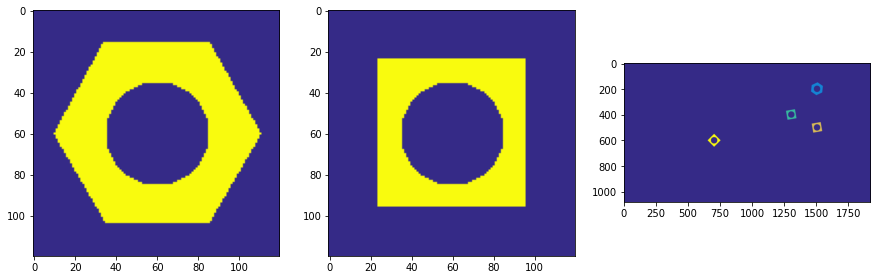

In [5]:
image1, labels1, stats1, centroids1 = cv.connectedComponentsWithStats(closing1)
image2, labels2, stats2, centroids2 = cv.connectedComponentsWithStats(closing2)
image3, labels3, stats3, centroids3 = cv.connectedComponentsWithStats(closing3)

hexnut_template_colored = cv.applyColorMap((labels1/np.amax(labels1)*255).astype('uint8'), cv.COLORMAP_PARULA)
squarenut_template_colored = cv.applyColorMap((labels2/np.amax(labels2)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colored = cv.applyColorMap((labels3/np.amax(labels3)*255).astype('uint8'), cv.COLORMAP_PARULA)

fig, ax = plt. subplots(1,3, figsize =(15,15))
ax[0].imshow(cv.cvtColor(hexnut_template_colored, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template_colored, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colored, cv.COLOR_BGR2RGB))
plt.show()

In [6]:
print("Number of connected components of hexnut_template : ", image1)
print("Number of connected components of squarenut_template : ", image2)
print("Number of connected components of conveyor_f100 : ", image3)

Number of connected components of hexnut_template :  2
Number of connected components of squarenut_template :  2
Number of connected components of conveyor_f100 :  5


In [7]:
print("Background of the hexnut_template - area and centroid : " ,stats1[0][cv.CC_STAT_AREA], ",", centroids1[0])
print("Object in the hexnut_template - area and centroid : " ,stats1[1][cv.CC_STAT_AREA], ",", centroids1[1])
print("Background of the squarenut_template - area and centroid : " ,stats2[0][cv.CC_STAT_AREA], ",", centroids2[0])
print("Object in the squarenut_template - area and centroid : " ,stats2[1][cv.CC_STAT_AREA], ",", centroids2[1])
print("Background of the conveyor_f100 - area and centroid : " ,stats3[0][cv.CC_STAT_AREA], ",", centroids3[0])
print("objects in the conveyor_f100 - area : " ,stats3[0][cv.CC_STAT_AREA], ",",stats3[1][cv.CC_STAT_AREA], ",", stats3[2][cv.CC_STAT_AREA],",",stats3[3][cv.CC_STAT_AREA])
print("objects in the conveyor_f100 - centroids : ",centroids3[0],",",centroids3[1],",",centroids3[2],",",centroids3[3])


Background of the hexnut_template - area and centroid :  9672 , [59.33684864 59.63513234]
Object in the hexnut_template - area and centroid :  4728 , [59.83375635 59.22356176]
Background of the squarenut_template - area and centroid :  11173 , [59.5875772 59.5875772]
Object in the squarenut_template - area and centroid :  3227 , [59.19677719 59.19677719]
Background of the conveyor_f100 - area and centroid :  2059646 , [957.36323524 540.44416273]
objects in the conveyor_f100 - area :  2059646 , 4636 , 3087 , 3087
objects in the conveyor_f100 - centroids :  [957.36323524 540.44416273] , [1499.24201898  199.28515962] , [1299.18302559  399.18302559] , [1499.18302559  499.18302559]


1) Background is assigned as label 0 in all three images. In the conveyor_f100 image, there are five connected components. In the hexnut_template and squarenut_template images, there are total two connected components.

2) Properties of the image are the statistics of the image. CC_STAT_LEFT, CC_STAT_TOP, CC_STAT_HEIGHT, CC_STAT_AREA, CC_STAT_WIDTH are these properties. Each property includes the leftmost (x) coordinate, the topmost (y) coordinate,the vertical size of the bounding box, the total area of the connected component, the horizontal size of the bounding box respectively.

3) center cordinates of each connected contours

Contour Analysis

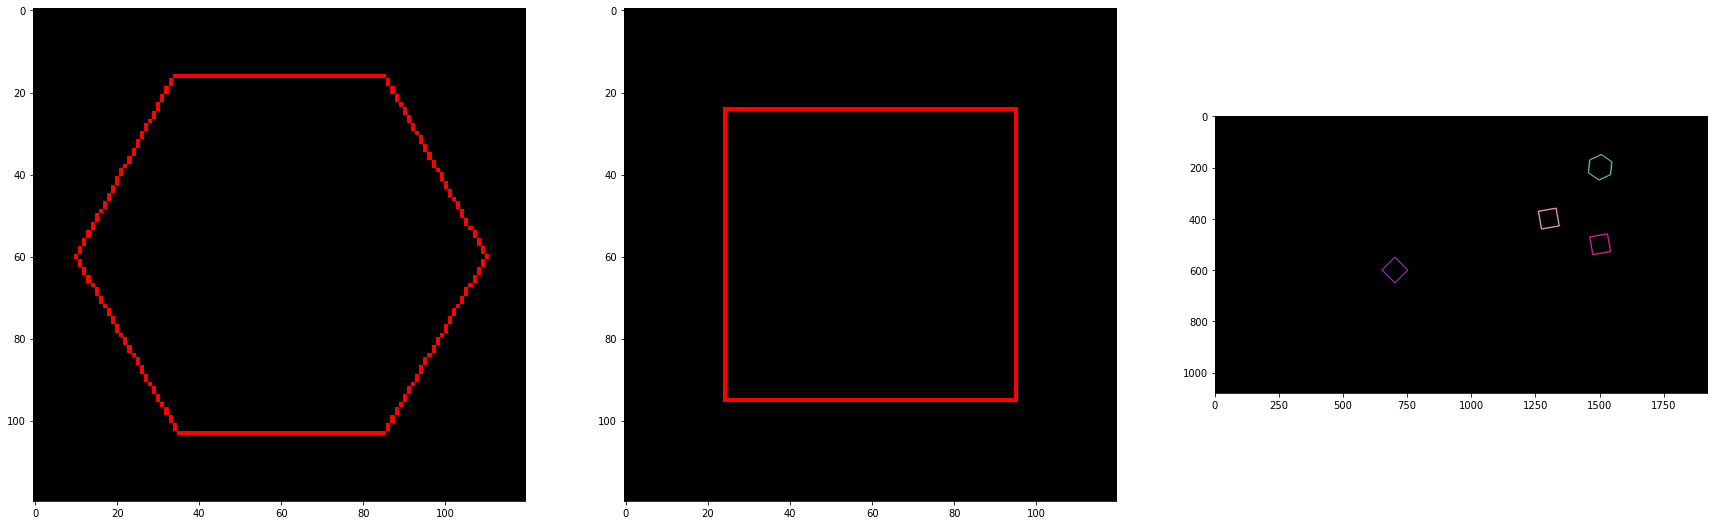

In [9]:
contours1, hierarchy1 = cv.findContours(closing1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_template_contour = contours1[0]

contours2, hierarchy2 = cv.findContours(closing2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_template_contour = contours2[0]

contours3, hierarchy3 = cv.findContours(closing3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

new_hex = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(new_hex, contours1, -1, (0, 0, 255))  
new_squ = np.zeros(squarenut_template.shape, dtype=np.uint8)
cv.drawContours(new_squ, contours2, -1, (0, 0, 255)) 
new_conveyor = np.zeros(conveyor_f100.shape, dtype=np.uint8)

import random as rng
for i in range(len(contours3)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(new_conveyor, contours3, i, color, 3)

fig, ax = plt. subplots(1,3, figsize = (30,30))
ax[0].imshow(cv.cvtColor(new_hex, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(new_squ, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(new_conveyor, cv.COLOR_BGR2RGB))
plt.show()


Detecting Objects on a Synthetic Conveyor

In [2]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame1 = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame1.append(frame.copy())

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [11]:
count1 = 0
count2 = 0
for t in contours3:
    r1 = cv.matchShapes(t,squarenut_template_contour,1,0.0)
    r2 = cv.matchShapes(t,hexnut_template_contour,1,0.0)
    if (r1 < 0.005): 
        count1 += 1
    if (r2 < 0.005):
        count2 +=1
        
print("Number of Hexagonal nuts in the image : ", count2)
print("Number of Squre nuts in the image : ", count1)

Number of Hexagonal nuts in the image :  1
Number of Squre nuts in the image :  3


In [ ]:
img1 = cv.imread('hexnut_template.png',0)
img2 =  cv.imread('squarenut_template.png',0)
img3 =  cv.imread('conveyor_f100.png',0)
img4 = cv.imread('conveyor_f101.png',0)

ret, thresh1 = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)
ret, thresh4 = cv.threshold(img4, 127, 255,0)

contours,hierarchy = cv.findContours(thresh1,2,1)
cnt1 = contours[1]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[1]

contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours
count_1 = 0
count_2 = 0

for i in cnt3:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        count_1+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)
    if ret2 < 0.001:
        count_1+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
new_img = img3.copy()
cv.putText(new_img,"Hexaganol:" + str(count_1) , (100, 150), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv.LINE_AA)
cv.putText(new_img,"square:" + str(count_2) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv.LINE_AA)
cv.imshow('Conveyor', new_img)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt. subplots(figsize =(10,10))
ax.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.show()

contours,hierarchy = cv.findContours(thresh4,2,1)
cnt4 = contours
count_1 = 0
count_2 = 0

for i in cnt4:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        count_1+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)

    if ret2 < 0.001:
        count_2+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
img = img4.copy()
cv.putText(img,"Hexaganol:" + str(count_1) , (100, 150), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 1, cv.LINE_AA)
cv.putText(img,"square:" + str(count_2) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 1, cv.LINE_AA)
cv.imshow('Conveyor', img)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt. subplots(figsize =(10,10))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [3]:
frame_array = []
shape = (1080, 1920,3)
for fr in frame1[:]:
    fr = cv.cvtColor(fr, cv.COLOR_BGR2GRAY)                                  
    ret, thresh = cv.threshold(fr, 127, 255,0)                              
    contours,hierarchy = cv.findContours(thresh,2,1)                           
    count_1 = 0
    count_2 = 0
    for con in contours:
        area = cv.contourArea(con)
        if (6715< area <6815):
            ret1 = cv.matchShapes(con, contours1[0], 1, 0.0)
            if ret1 < 0.001:
                count_2 +=1
        if (5150< area <5250):
            ret2 = cv.matchShapes(con, contours2[0], 1, 0.0)
            if ret2 < 0.001:
                count_2 +=1
        
    cv.putText(img,"Hexaganol:" + str(count_1) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    cv.putText(img,"square:" + str(count_2) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    frame_array.append(img)


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0])) 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable